## Traj Check 

In [1]:
import numpy as np
import math

def compute_msd_with_inconsistent_frames(trajectories):
    msds = []
    num_frames = max([max(frames) for frames,_ in trajectories])
    # Loop over each trajectory
    for frames, coordinates in trajectories:
        num_frames = len(frames)
        displacements = []

        # Loop over each possible lag time
        for tau in range(1, num_frames):
            squared_displacements = []
            
            # Loop over all pairs of frames with the correct time difference (tau)
            for i in range(num_frames):
                for j in range(i + 1, num_frames):
                    frame_diff = frames[j] - frames[i]  # Difference in frame numbers
                    if frame_diff == tau:
                        x1,y1 = coordinates[j]
                        x2, y2 = coordinates[i]
                        squared_displacement = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)  # Sum of squares of displacements
                        squared_displacements.append(squared_displacement)
            
            # Only compute MSD if there are valid displacements for this tau
            if squared_displacements:
                mean_squared_displacement = np.mean(squared_displacements)
                displacements.append(mean_squared_displacement)
            else:
                # No valid displacements for this tau, so append NaN or skip
                displacements.append(np.nan)
        
        # Store the MSDs for this trajectory
        msds.append(displacements)
    
    return msds

#msd_results = compute_msd_with_inconsistent_frames(trajectories)

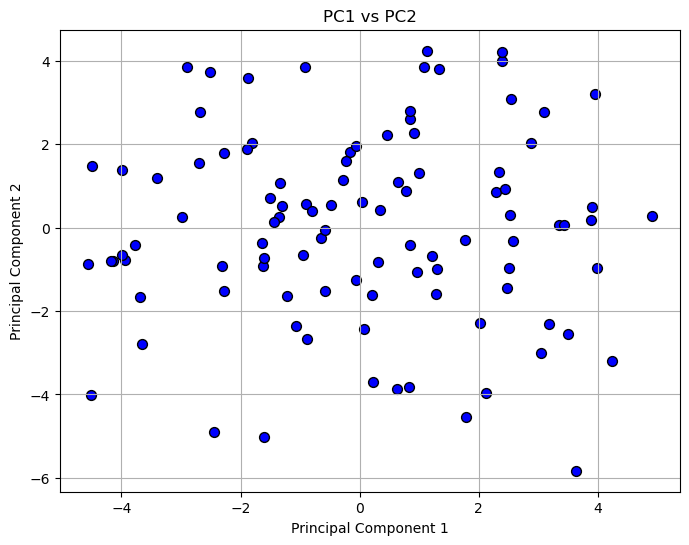

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Example: Randomly generated 2D trajectories with 100 time steps
n_trajectories = 100
time_steps = 100
data = np.random.rand(n_trajectories, time_steps, 2)  # 100 trajectories of 2D points

# Flatten each trajectory
flattened_data = data.reshape(n_trajectories, time_steps * 2)

# Standardize the data
scaler = StandardScaler()
flattened_data_std = scaler.fit_transform(flattened_data)

# Apply PCA
pca = PCA(n_components=10)  # Retain 10 principal components
principal_components = pca.fit_transform(flattened_data_std)
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

# Plot PC1 against PC2
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c='blue', marker='o', edgecolor='k', s=50)
plt.title('PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [3]:
from andi_datasets.models_phenom import models_phenom
import random
import numpy as np
traj_simu,_ = models_phenom().multi_state(
            N = 5,
            L = 20,
            T = 6,
            alphas =  [1.2, 0.7],
            Ds = [[10*0.1, 0.1], [1.2*0.1, 0.0]],
            M = [[0.98, 0.02], [0.02, 0.98]],
        )
print(traj_simu.shape[-1])
stacked_array = np.vstack([np.hstack([np.transpose(traj_simu[i,:, j]) for i in range(traj_simu.shape[0])]) 
                            for j in range(traj_simu.shape[-1])])
centroids = np.transpose(stacked_array) 
#print(centroids)
node_index_labels = np.hstack([np.arange(traj_simu.shape[1]) for idx in range(traj_simu.shape[0])]).astype(float)
node_index_labels /= 4.0
print(node_index_labels)
#print(centroids)
pool = []
for i in range(5):
    pool.extend([i] * min(2, 6 // 5 + 1))

# Randomly shuffle the pool and return the first N elements
random.shuffle(pool)
idx =  pool[:6]
print(idx)
del_idx = [index+5*i for i,index in enumerate(idx)]
print(del_idx)
node_index_labels_up = np.delete(node_index_labels, del_idx, axis=0)
print(node_index_labels_up)

2
[0.   0.25 0.5  0.75 1.   0.   0.25 0.5  0.75 1.   0.   0.25 0.5  0.75
 1.   0.   0.25 0.5  0.75 1.   0.   0.25 0.5  0.75 1.   0.   0.25 0.5
 0.75 1.  ]
[2, 3, 3, 1, 4, 1]
[2, 8, 13, 16, 24, 26]
[0.   0.25 0.75 1.   0.   0.25 0.5  1.   0.   0.25 0.5  1.   0.   0.5
 0.75 1.   0.   0.25 0.5  0.75 0.   0.5  0.75 1.  ]


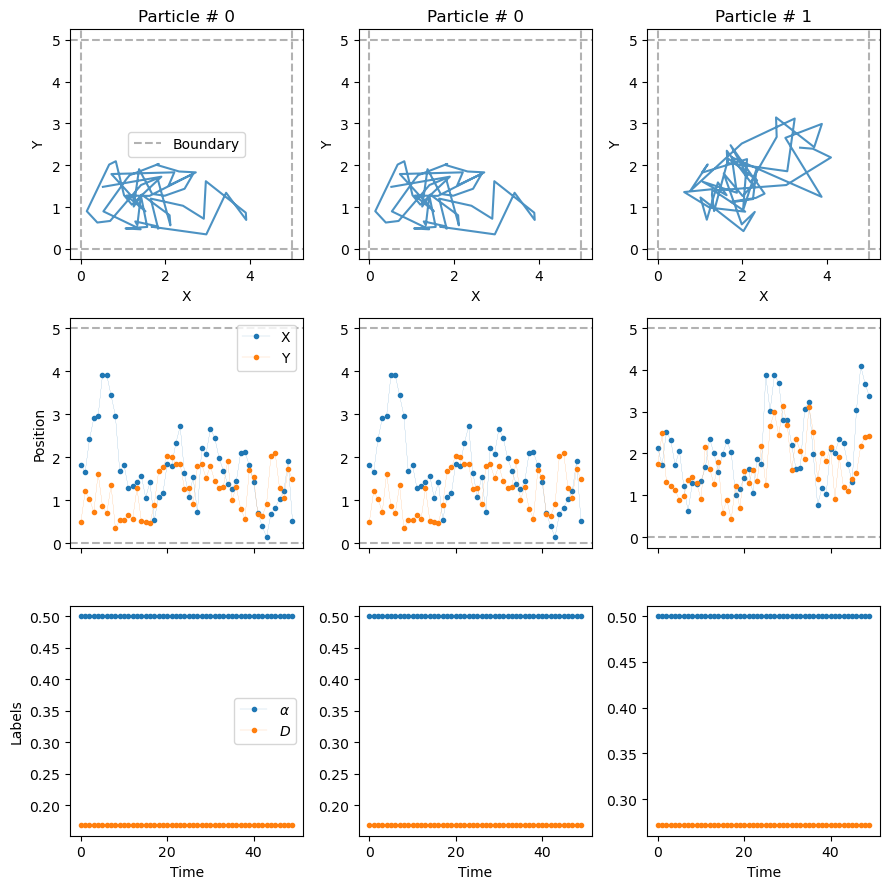

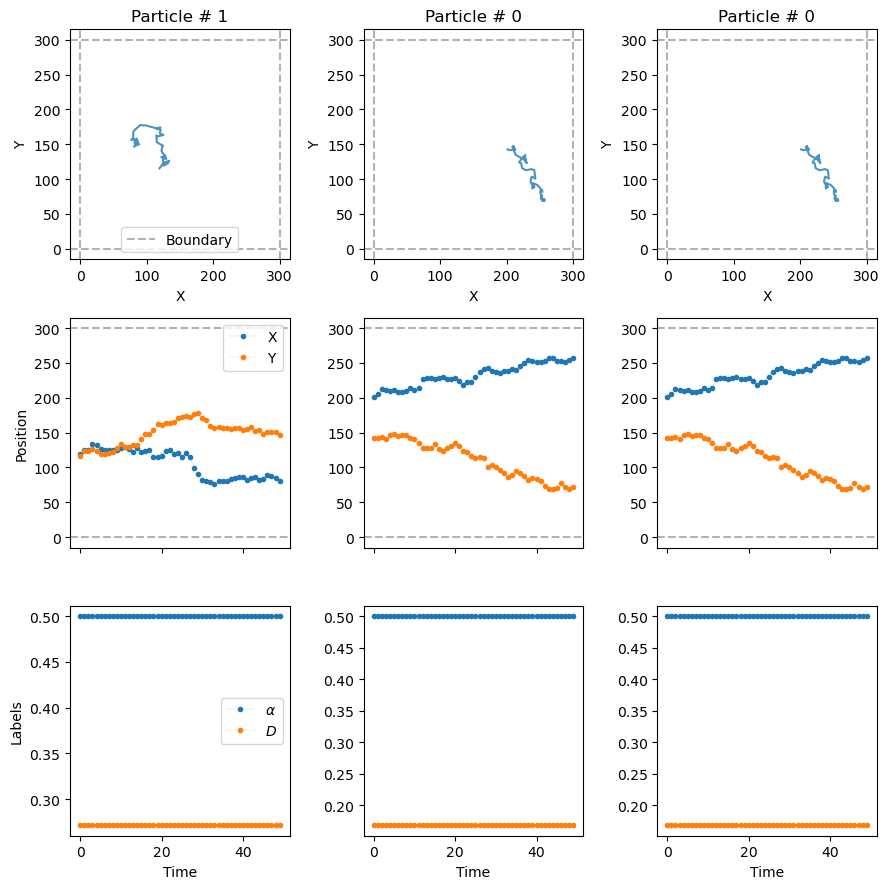

In [52]:
from andi_datasets.models_phenom import models_phenom
from andi_datasets.utils_trajectories import plot_trajs
traj_move, labels_model2 = models_phenom().multi_state(
                    N = 3,
                    L = 300,
                    T = 50,
                    alphas =  [1.2, 0.7],  
                    Ds = [[10, 0.1], [1, 0.1]],
                    M = [[0.9, 0.10], [0.90, 0.10]],  ## [[0.98, 0.02], [0.02, 0.98]]
                ) 
traj_steady, labels_model2 = models_phenom().single_state(
                    N = 3, 
                    L = 5, ##
                    T = 50,
                    Ds = [0.06, 0.1], # Mean and variance
                    alphas = 0.5
                )
plot_trajs(traj_steady, 5, 3, labels = labels_model2, plot_labels = True)
plot_trajs(traj_move, 300, 3, labels = labels_model2, plot_labels = True)

In [10]:
from andi_datasets.models_phenom import models_phenom
import random
import numpy as np
import pandas as pd
from Build_graph import Graph_Generator

graph_Generator = Graph_Generator(
        connectivity_radius=25, num_particle_sim= 200, 
        len_frame_sim= 1314, num_frame_sim= 30, 
        D_sim= 1, max_gap= 3, prob_noise= 0.05, prop_steady = 0.5
    )
train_graph = graph_Generator(particle_feature_pth= "/home/user/Project_thesis/Particle_Hana/Cell7__ground_truth/particle_fea(mean_intens)(orient).csv")

In [11]:
from Test_com_2 import compute_trajectories
from MAGIK_model import Classifier_model
from deeplay import BinaryClassifier, Adam
import torch
from tqdm import tqdm

device = torch.device("cpu")
checkpt_pth = "/home/user/Project_thesis/Particle_Hana/Cell7__ground_truth/model_(Consec(mean), num=50, new_D)(500).pt"
new_model = Classifier_model()
classifier = BinaryClassifier(model=new_model, optimizer=Adam(lr=1e-3))
classifier = classifier.create()
classifier.model.load_state_dict(torch.load(checkpt_pth, weights_only=True))
classifier.model.to(device) 
classifier.eval()

pred = classifier(train_graph.to(device))
predictions = pred.detach().numpy()
predictions = np.where(predictions < 0.5, 0.0, predictions)

post_processor = compute_trajectories()
trajectories = post_processor(train_graph, predictions.squeeze())
filter_trajectories = [traj for traj in trajectories if len(traj) > 1]
traj_coord = []
with tqdm(total=len(filter_trajectories), desc="Gen Coord") as pbar:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    for traj in filter_trajectories:
        frames = train_graph.frames[list(traj)].to(device)
        traj_tensor = torch.tensor(list(traj), device=device)
        sorted_frames, sorted_idx = torch.sort(frames)
        sorted_traj = traj_tensor[sorted_idx]
        coordinates = train_graph.x.to(device)[sorted_traj]
        coordinates[:, 0] = coordinates[:, 0]*1314
        coordinates[:, 1] = coordinates[:, 1]*1314
        traj_coord.append((sorted_frames.cpu().numpy(), coordinates.cpu().numpy()))
        pbar.update(1)
torch.cuda.empty_cache()

Gen Coord: 100%|██████████| 311/311 [00:00<00:00, 7626.19it/s]


In [2]:
from Test_com_2 import compute_trajectories
from MAGIK_model import Classifier_model
from Build_graph import Graph_Generator
from deeplay import BinaryClassifier, Adam
import torch
import numpy as np
from tqdm import tqdm

device = torch.device("cpu")
checkpt_pth = "/home/user/Project_thesis/Particle_Hana/Cell7__ground_truth/model_(Consec(mean), num=50, new_D)(500).pt"
new_model = Classifier_model()
classifier = BinaryClassifier(model=new_model, optimizer=Adam(lr=1e-3))
classifier = classifier.create()
classifier.model.load_state_dict(torch.load(checkpt_pth, weights_only=True))
classifier.model.to(device) 
classifier.eval()

graph_Generator = Graph_Generator(
    connectivity_radius= 20, frame_test=(200,230)
        )
test_graph = graph_Generator(particle_feature_pth= "/home/user/Project_thesis/Particle_Hana/Cell7__ground_truth/particle_fea(mean_intens)(orient).csv")

pred = classifier(test_graph.to(device))
#print(pred)
#predictions = pred.detach().cpu().numpy() > 0.5
predictions = pred.detach().numpy()
predictions = np.where(predictions < 0.5, 0.0, predictions)
ground_truth = test_graph.y.cpu().numpy()  ## TODO

count = 0
""" for idx in range(predictions.shape[0]):
    if predictions[idx, 0] == ground_truth[idx, 0]:
        count += 1
count /= len(predictions)
print(f"MSE is:{count}") """

post_processor = compute_trajectories()
trajectories = post_processor(test_graph, predictions.squeeze())
filter_trajectories = [traj for traj in trajectories if len(traj) > 1]
traj_coord = []
count_ques = 0
with tqdm(total=len(filter_trajectories), desc="Gen Coord") as pbar:
    #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    for traj in filter_trajectories:
        frames = test_graph.frames[list(traj)].to(device)
        traj_tensor = torch.tensor(list(traj), device=device)

        sorted_frames, sorted_idx = torch.sort(frames)
        if len(sorted_frames) != len(torch.unique(sorted_frames)):
            count_ques += 1
            if count_ques == 3:
                print(np.array(list(traj)))
                print(frames.cpu().numpy())
                print(sorted_frames.cpu().numpy())
            

                break
        sorted_traj = traj_tensor[sorted_idx]
        coordinates = test_graph.x.to(device)[sorted_traj]
        coordinates[:, 0] = coordinates[:, 0]*1314
        coordinates[:, 1] = coordinates[:, 1]*1054
        unique_frames = []
        unique_coordinates = []
        last_frame = None
        for i, frame in enumerate(sorted_frames):
            if last_frame is None:
                unique_frames.append(frame)
                unique_coordinates.append(coordinates[i])
                last_frame = frame
            
            elif frame != last_frame:
                last_coord = unique_coordinates[-1]
                frame_mask = sorted_frames == frame
                coord_frame = coordinates[frame_mask, :]
                distances = np.linalg.norm(coord_frame - last_coord, axis=1)
                min_distance_index = np.argmin(distances)
                unique_frames.append(frame)
                unique_coordinates.append(coord_frame[min_distance_index] )
                last_frame = frame

        # Convert lists to tensors
        unique_frames = torch.stack(unique_frames)
        unique_coordinates = torch.stack(unique_coordinates)
        traj_coord.append((sorted_frames.cpu().numpy(), unique_coordinates.cpu().numpy()))
        pbar.update(1)

torch.cuda.empty_cache()
print(count_ques)

Gen Coord:   2%|▏         | 6/246 [00:00<00:00, 1166.49it/s]

[1794  395 3214 4622  399 3218  915 2325  919 2329 3739 1436 3743 5151
 1440 4263 2862 1967   49 2866 1971   53  568  572 4797 3391 1088 3395
 1092 2505 1611 3915 2509 3919 1615 5329  221 4446 3039  225 2147  740
 3043 2151  744 3564 4973 1262 3568 1266 4088 2683 4092 1790 2687]
[210. 202. 218. 226. 202. 218. 205. 213. 205. 213. 221. 208. 221. 229.
 208. 224. 216. 211. 200. 216. 211. 200. 203. 203. 227. 219. 206. 219.
 206. 214. 209. 222. 214. 222. 209. 230. 201. 225. 217. 201. 212. 204.
 217. 212. 204. 220. 228. 207. 220. 207. 223. 215. 223. 210. 215.]
[200. 200. 201. 201. 202. 202. 203. 203. 204. 204. 205. 205. 206. 206.
 207. 207. 208. 208. 209. 209. 210. 210. 211. 211. 212. 212. 213. 213.
 214. 214. 215. 215. 216. 216. 217. 217. 218. 218. 219. 219. 220. 220.
 221. 221. 222. 222. 223. 223. 224. 225. 226. 227. 228. 229. 230.]
3


Prune Edges (Batched): 100%|██████████| 4/4 [00:00<00:00, 36.73it/s]


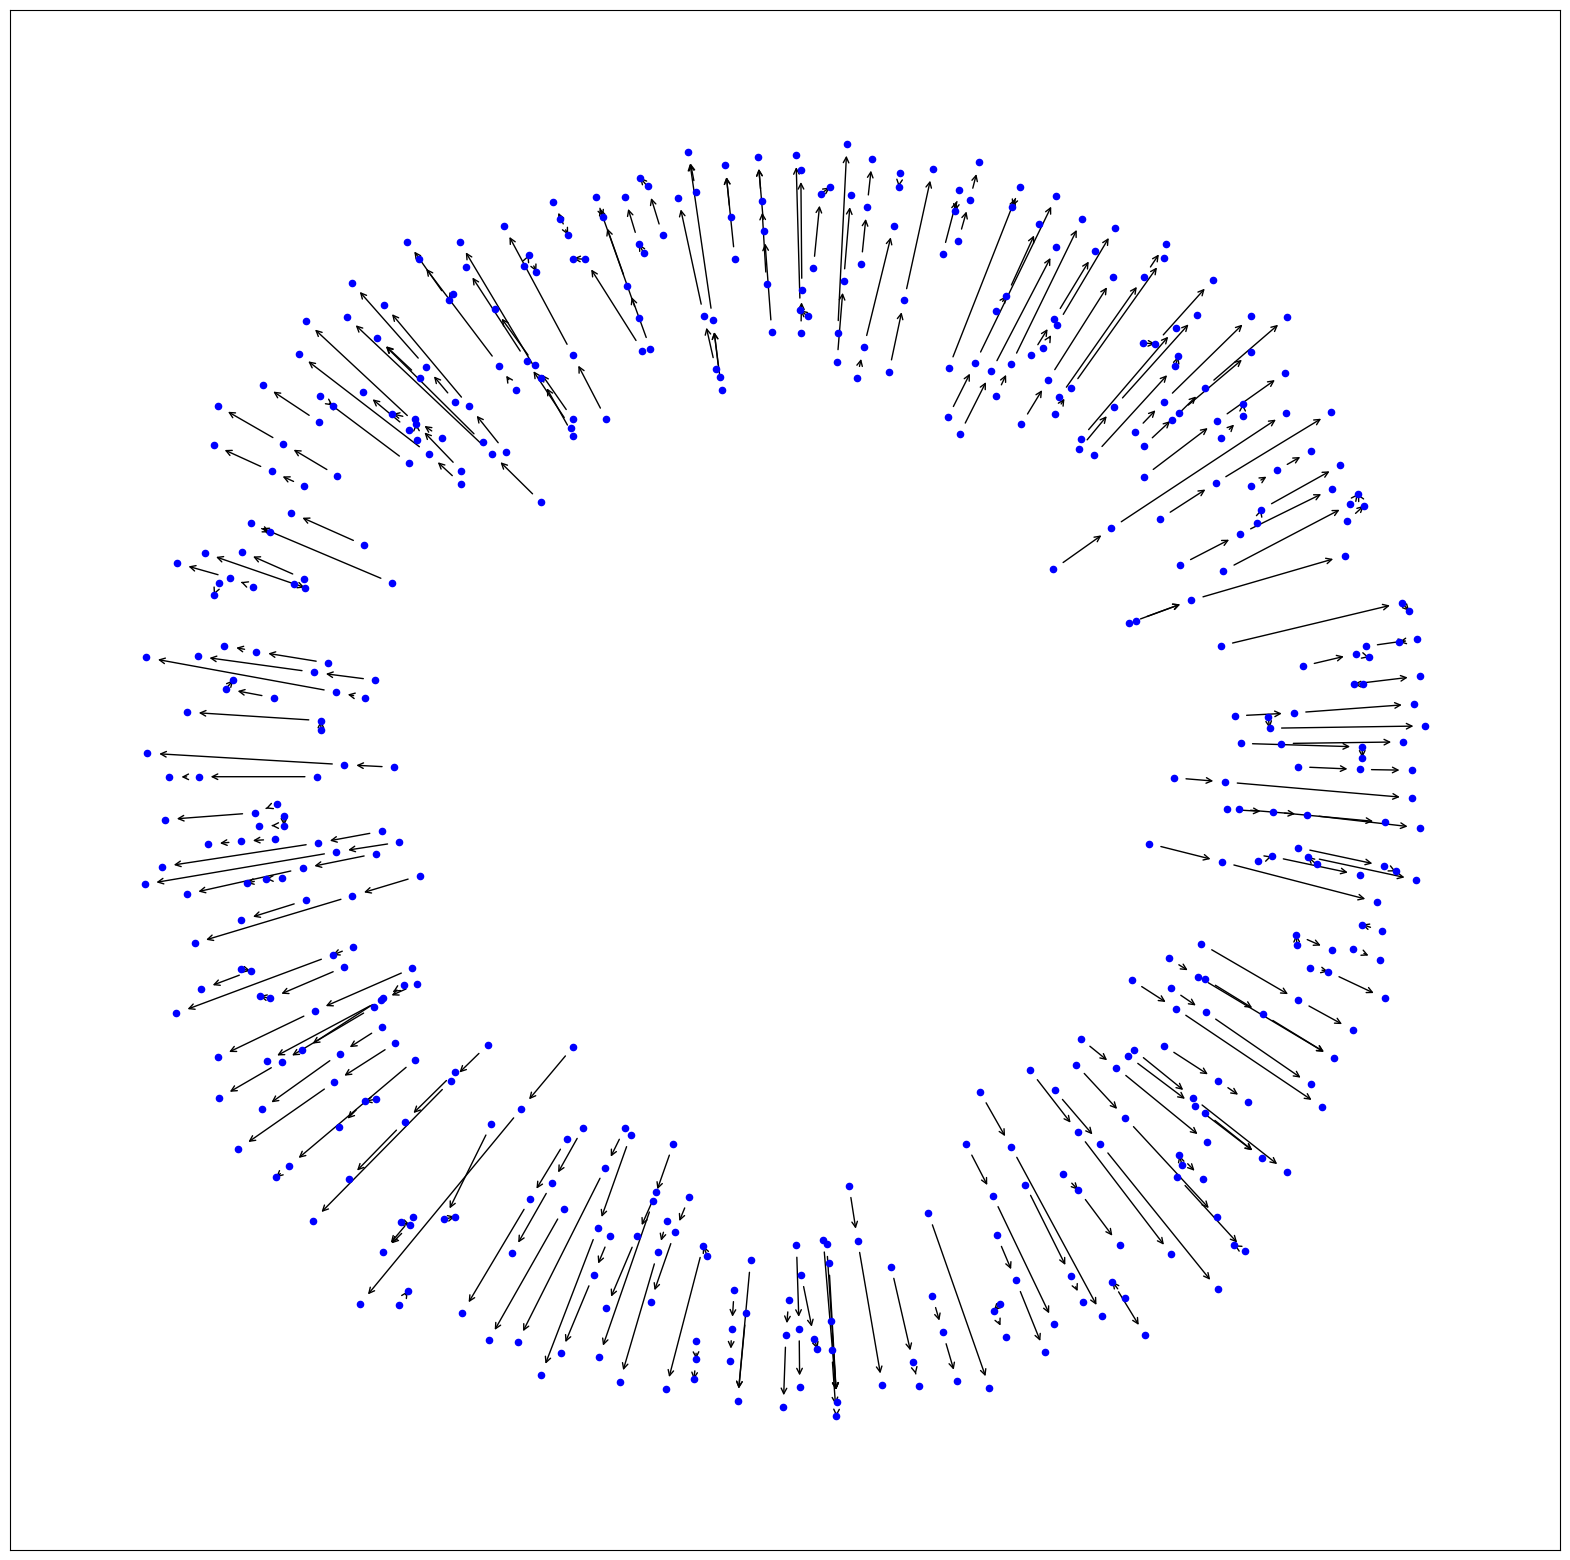

[{139, 316, 492}, {267, 444, 95}, {121, 471, 295}, {440, 91, 263}, {56, 227, 404}, {291, 117, 467}, {73, 245, 422}, {513, 330, 156, 335}, {201, 379, 31}, {192, 369, 21}, {57, 228, 405}, {475, 301}, {272, 448}, {17, 188, 365}, {168, 346, 525}, {65, 237, 414}, {42, 213, 389}, {225, 403, 54}, {219, 396, 47}, {155, 508, 334}, {150, 502, 327}, {50, 221, 398}, {257, 434, 85}, {64, 235, 412}, {248, 76, 423}, {427, 79, 81, 250, 253}, {105, 455, 279}, {11, 359, 183}, {24, 370, 195}, {408, 60, 231}, {72, 244, 421}, {232, 409, 61}, {474, 124, 300}, {477, 302, 127}, {424, 74, 246}, {260, 438, 87}, {312, 488, 136}, {360, 12, 182}, {2, 355, 173}, {264, 441, 92}, {456, 282, 108}, {461, 111, 113, 285, 287}, {58, 229, 406}, {35, 206, 383}, {520, 163}, {112, 462, 286}, {487, 311, 135}, {366, 18, 19, 189, 190}, {32, 196, 203, 28, 381}, {416, 68, 239}, {307, 131, 481}, {41, 212, 390}, {143, 495, 319}, {345, 523, 167}, {283, 109, 459}, {240, 417, 69}, {130, 482, 306}, {8, 179, 356, 6}, {234, 411, 63}, {425

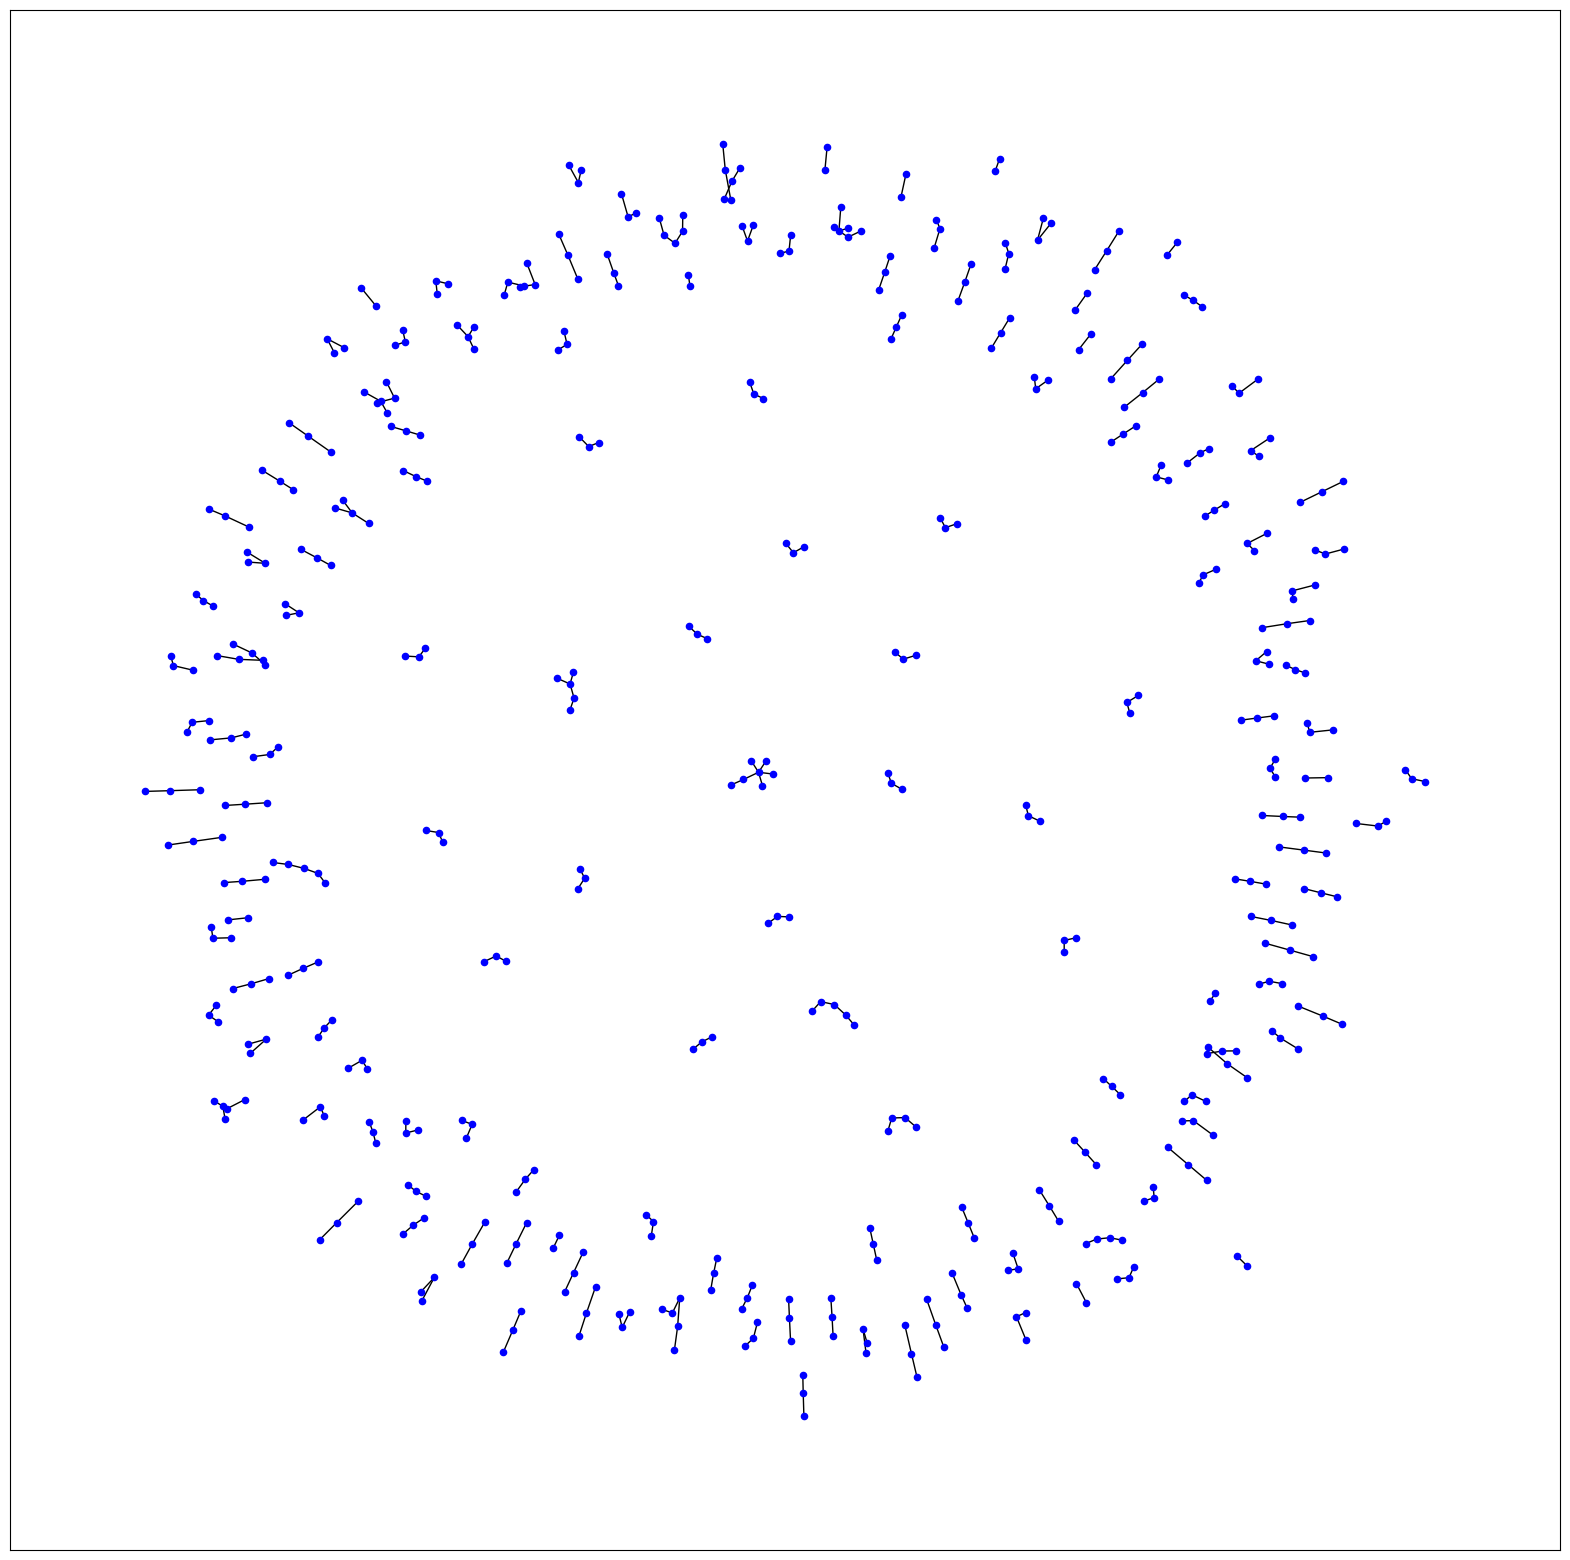

In [ ]:
from Test_com_2 import compute_trajectories
from MAGIK_model import Classifier_model
from Build_graph import Graph_Generator
import numpy as np
from deeplay import BinaryClassifier, Adam
import torch
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

device = torch.device("cpu")
checkpt_pth = "/home/user/Project_thesis/Particle_Hana/Cell7__ground_truth/model_(Consec(mean), num=50, new_D)(500).pt"
new_model = Classifier_model()
classifier = BinaryClassifier(model=new_model, optimizer=Adam(lr=1e-3))
classifier = classifier.create()
classifier.model.load_state_dict(torch.load(checkpt_pth, weights_only=True))
classifier.model.to(device) 
classifier.eval()

graph_Generator = Graph_Generator(
    connectivity_radius= 20, frame_test=(0,2)
        )
test_graph = graph_Generator(particle_feature_pth= "/home/user/Project_thesis/Particle_Hana/Cell7__ground_truth/particle_fea(mean_intens)(orient).csv")

pred = classifier(test_graph.to(device))
#print(pred)
#predictions = pred.detach().cpu().numpy() > 0.5
predictions = pred.detach().numpy()
predictions = np.where(predictions < 0.5, 0.0, predictions)
post_processor = compute_trajectories()
_, prune_edges = post_processor(test_graph, predictions.squeeze())
frames = test_graph.frames.cpu().numpy()

prune_graph = nx.DiGraph()
prune_graph.add_edges_from(prune_edges)

# Use DFS from each node and collect all paths
all_dfs_paths = []

for start_node in prune_graph.nodes:
    paths = nx.single_source_dfs(prune_graph, start_node)
    for path in paths:
        all_dfs_paths.append(path)

# Print all DFS-based paths
for path in all_dfs_paths:
    print(path)




plt.figure(figsize=(20,20))
pos = nx.spring_layout(prune_graph)
nx.draw_networkx_nodes(prune_graph, pos, node_size=20, node_color="blue")
nx.draw_networkx_edges(prune_graph, pos, edgelist=prune_graph.edges(), arrowstyle='->')
plt.show()

#trajectories = list(nx.weakly_connected_components(prune_graph))
#print(trajectories)

prune_graph = nx.Graph()
prune_graph.add_edges_from(prune_edges)

plt.figure(figsize=(20,20))
pos = nx.spring_layout(prune_graph)
nx.draw_networkx_nodes(prune_graph, pos, node_size=20, node_color="blue")
nx.draw_networkx_edges(prune_graph, pos, edgelist=prune_graph.edges())
plt.show()

In [6]:
def retrieve(prune_edges, num, edge_index):
    for idx in range(edge_index.size(1)):
        i, j = edge_index[0, idx].item(), edge_index[1, idx].item()

        # Check if `i` matches `num` and recurse on `j`
        if j == num and (i, j) in prune_edges:
            next_num = i
            print(next_num)
            return retrieve(prune_edges, next_num, edge_index)

        """ # Check if `j` matches `num` and recurse on `i`
        elif j == num and (i, j) in prune_edges:
            next_num = i
            print(next_num)
            return retrieve(prune_edges, next_num, edge_index) """
        
    return 0

retrieve(prune_edges, 2763, test_graph.edge_index)
retrieve(prune_edges, 2758, test_graph.edge_index)

2583
2404
2225
2043
1863
1684
1505
1334
1162
990
814
642
469
297
121


0

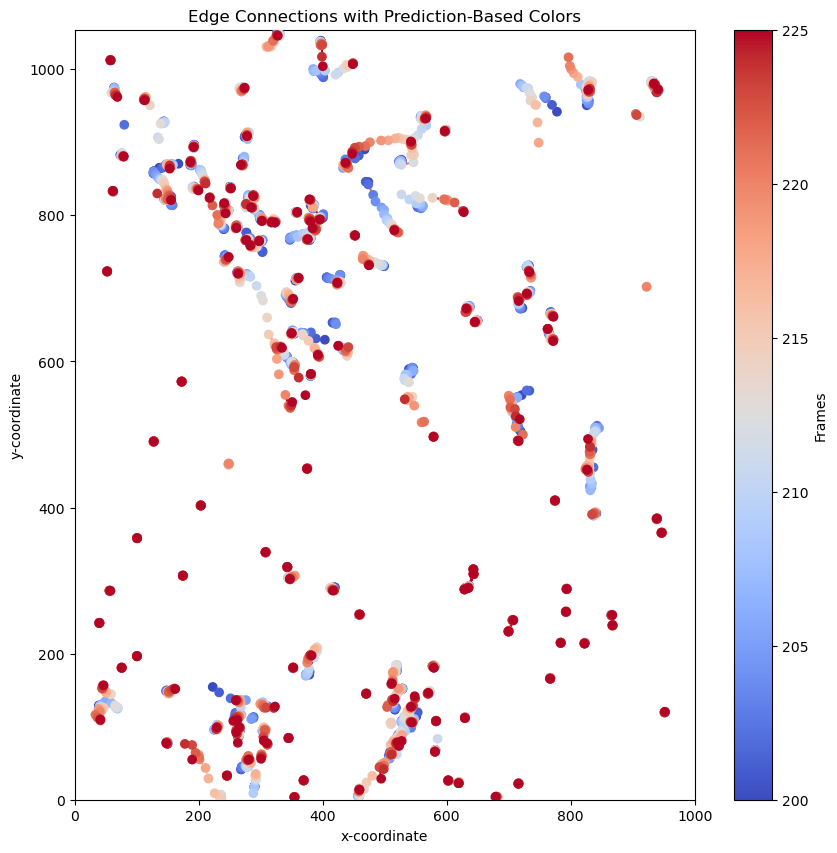

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
import numpy as np

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Define colormap and normalize predictions
cmap = cm.coolwarm  # Use the 'viridis' colormap
norm = mcolors.Normalize(vmin=0.5, vmax=1)

# Collect line segments and colors
line_segments = []
colors = []

for idx in range(test_graph.edge_index.size(1)):
    i, j = test_graph.edge_index[0, idx], test_graph.edge_index[1, idx]
    if predictions[idx] > 0 and (i.item(), j.item()) in prune_edges:
        # Line segment from point i to j
        segment = [[test_graph.x[i, 0].item()*1314, test_graph.x[i, 1].item()*1054], 
                [test_graph.x[j, 0].item()*1314, test_graph.x[j, 1].item()*1054]]
        line_segments.append(segment)
    
    # Color based on prediction, normalized
        colors.append(cmap(norm(predictions[idx])))

if line_segments:  # Ensure there's data to plot
    lc = LineCollection(line_segments, colors=colors, linewidths=1.5, alpha=1.0)
    ax.add_collection(lc)

    # Set plot limits based on scaled coordinates
x_coords = test_graph.x[:, 0].cpu().numpy() * 1314
y_coords = test_graph.x[:, 1].cpu().numpy() * 1054
ax.set_xlim(0,1000)
ax.set_ylim(0, 1054)
# 
ax.scatter(x_coords, y_coords, c=frames, cmap="coolwarm", zorder=10)
# Colorbar for predictions
cmap = cm.coolwarm  # Use the 'viridis' colormap
norm = mcolors.Normalize(vmin=frames.min(), vmax=frames.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label="Frames")




# Set labels and show plot
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.set_title("Edge Connections with Prediction-Based Colors")
plt.show()

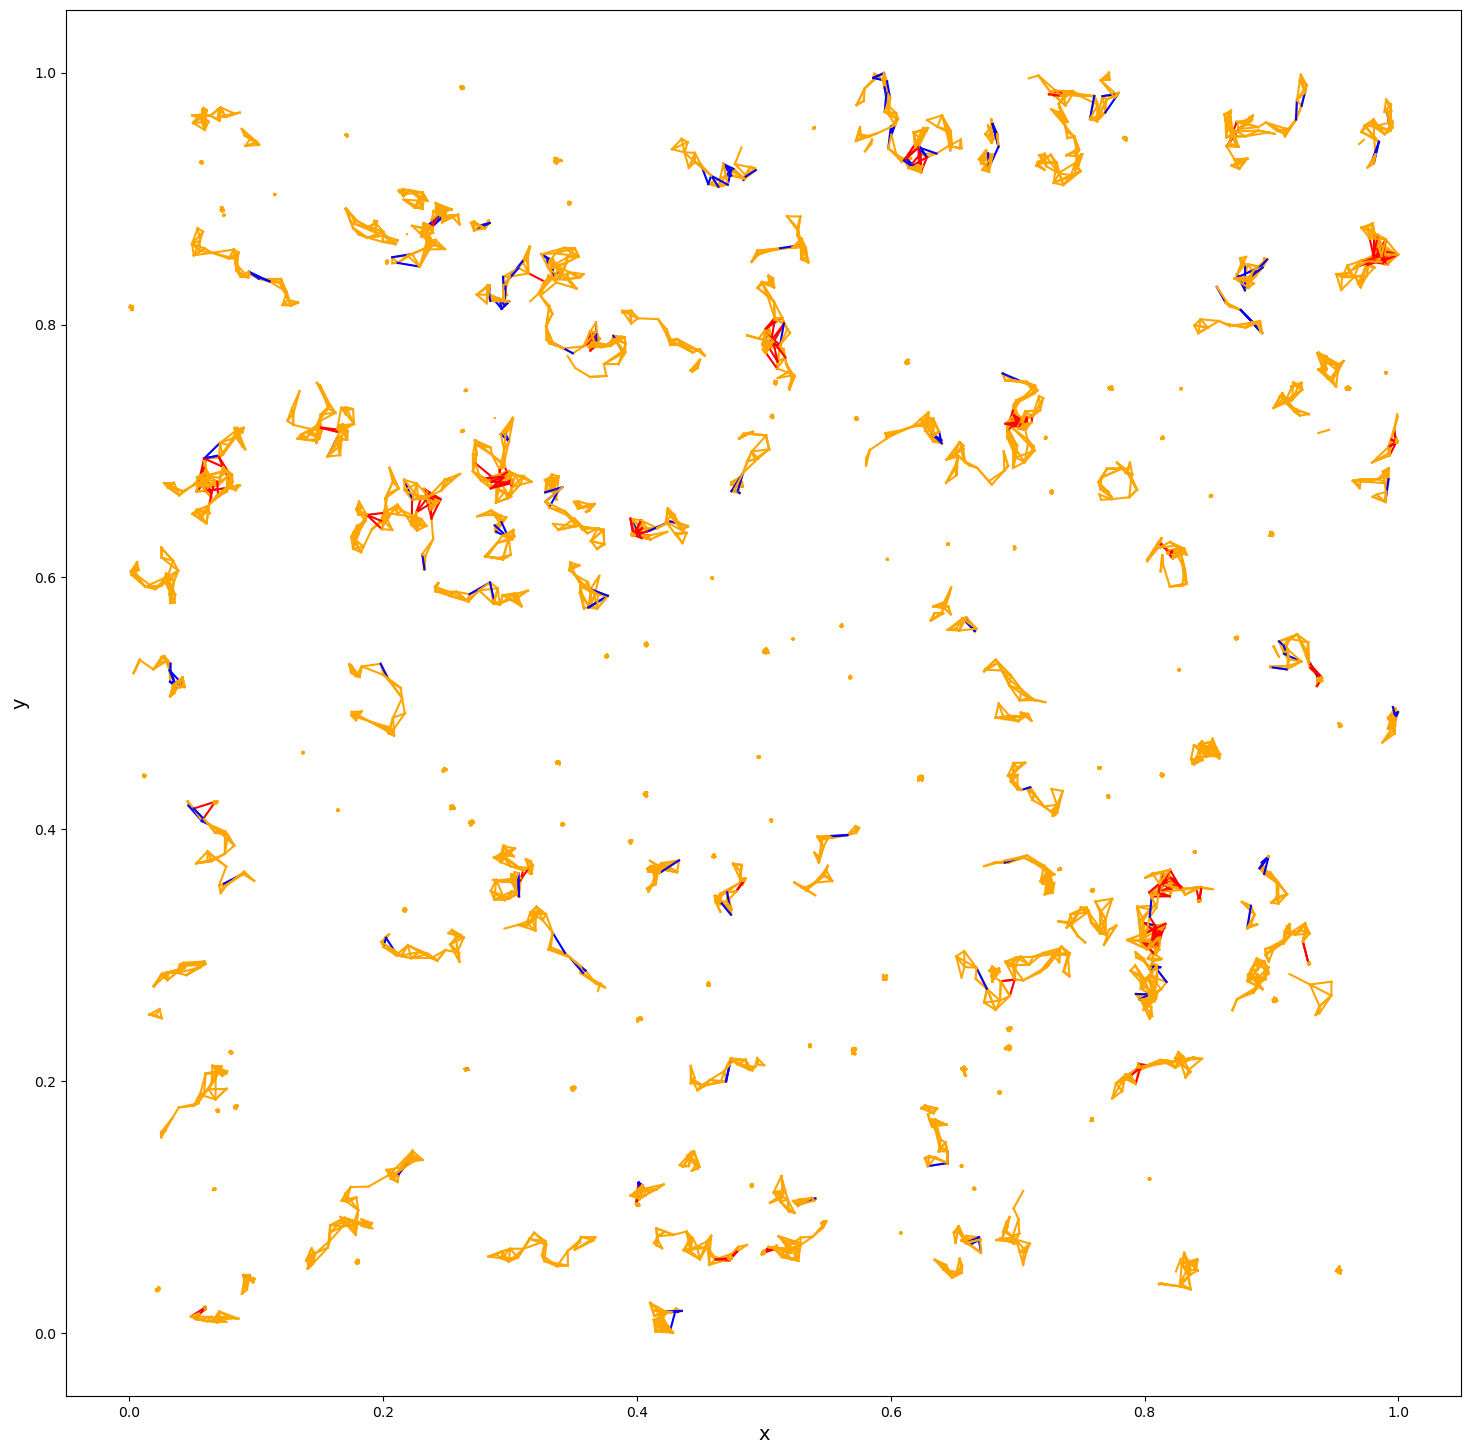

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))

for idx in range(train_graph.edge_index.size(1)):
    i, j = train_graph.edge_index[0, idx], train_graph.edge_index[1, idx]
    if train_graph.y.cpu().numpy()[idx] > 0 and predictions[idx] > 0:

        plt.plot(
            [train_graph.x[i, 1], train_graph.x[j, 1]],
            [train_graph.x[i, 0], train_graph.x[j, 0]],
            c="orange",
            alpha=1.0,
        )
    elif train_graph.y.cpu().numpy()[idx] > 0:
        plt.plot(
            [train_graph.x[i, 1], train_graph.x[j, 1]],
            [train_graph.x[i, 0], train_graph.x[j, 0]],
            c="blue",
            alpha=1.0,
        )
    elif predictions[idx] > 0:
        plt.plot(
            [train_graph.x[i, 1], train_graph.x[j, 1]],
            [train_graph.x[i, 0], train_graph.x[j, 0]],
            c="red",
            alpha=1.0,
        )
    

""" plt.scatter(
    train_graph.x[:, 1],
    train_graph.x[:, 0],
    c=train_graph.frames,
    cmap="viridis",
    zorder=0.5,
) """
# label colorbar
#cb = plt.colorbar()
#cb.ax.set_title('Frame', fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)

plt.show()

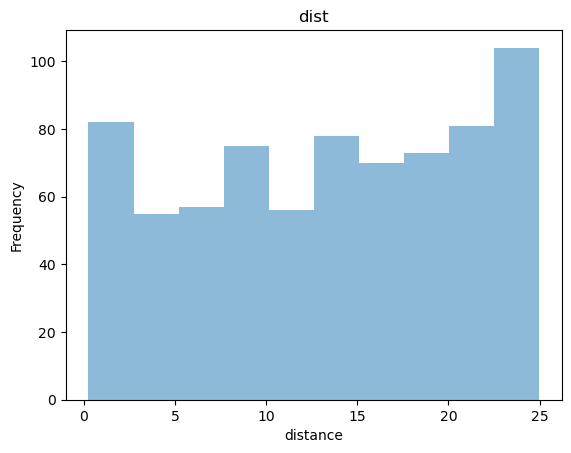

In [14]:
from mpl_toolkits.mplot3d import Axes3D

mask = (predictions > train_graph.y.cpu().numpy()) 
sender_mask = train_graph.edge_index.cpu().numpy()[:, mask.flatten()][0]
receive_mask = train_graph.edge_index.cpu().numpy()[:, mask.flatten()][1]
x_mask = np.abs(train_graph.x.cpu().numpy()[sender_mask,:][:,:2] - train_graph.x.cpu().numpy()[receive_mask,:][:,:2])
distances = np.linalg.norm(x_mask, axis=1)*1314
_, bins = np.histogram(distances, bins=10)  # Adjust number of bins as needed
plt.hist(distances, bins=bins, alpha=0.5)
plt.xlabel("distance")
plt.ylabel("Frequency")
plt.title("dist")
plt.show()

In [4]:
import numpy as np

def gen_track_avi(train_graph, frame_test, frame_region, trajectories):
    track_img_list = []
    # Define crop bounds
    x_start, x_end = frame_region[0]
    y_start, y_end = frame_region[1]
    device = "cpu"
    
    with tqdm(total=frame_test[1] - frame_test[0], desc="Gen video") as pbar:
        for frame_idx in range(frame_test[0], frame_test[1]):
            # Create figure with white background
            fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')
            ax.set_facecolor('white')
            
            # Create a white background image
            img = np.ones((1314, 1314)) * 255
            img = img[y_start:y_end, x_start:x_end]
            
            # Load particle positions from CSV
            frames = train_graph.frames.to(device)
            mask = frames == frame_idx
            coordinates = train_graph.x.to(device)
            selected_columns = coordinates[mask,:]
            
            # Plot particle centroids, adjusted for crop region
            for idx in range(selected_columns.shape[0]):
                x_coord = selected_columns[idx, 0] * 1314
                y_coord = selected_columns[idx, 1] * 1314
                
                # Only plot if the point is within the cropped bounds
                if x_start <= x_coord <= x_end and y_start <= y_coord <= y_end:
                    # Adjust the coordinates relative to the cropped region
                    adjusted_x = x_coord - x_start
                    adjusted_y = y_coord - y_start
                    ax.scatter(adjusted_x, adjusted_y, marker='o', s=100, 
                             edgecolor='red', facecolor='none', 
                             linewidth=0.8, alpha=0.8)
            
            # Plot trajectories, adjusting for crop region
            for frames, coordinates in trajectories:
                if np.where(frames == frame_idx)[0].size > 0:
                    ### on time
                    mask = frames.flatten() <= frame_idx
                    coordinates_idx = coordinates[mask]
                    
                    # Adjust trajectory coordinates for the cropped region
                    adjusted_coords = []
                    for coord in coordinates_idx:
                        x, y = coord[0], coord[1]
                        if x_start <= x <= x_end and y_start <= y <= y_end:
                            adjusted_coords.append([x - x_start, y - y_start])
                    
                    if len(adjusted_coords) > 1:
                        adjusted_coords = np.array(adjusted_coords)
                        ax.plot(adjusted_coords[:, 0], adjusted_coords[:, 1], 
                               linewidth=1, color="blue")
            
            # Display the image with proper settings for bright background
            ax.imshow(img, cmap="gray", vmin=0, vmax=255)
            
            # Keep axes and set their color to black for visibility
            ax.spines['bottom'].set_color('black')
            ax.spines['top'].set_color('black')
            ax.spines['right'].set_color('black')
            ax.spines['left'].set_color('black')
            ax.tick_params(axis='x', colors='black')
            ax.tick_params(axis='y', colors='black')
            
            # Add grid for better readability (optional)
            ax.grid(True, linestyle='--', alpha=0.3, color='gray')
            
            # Set labels and title (optional)
            ax.set_xlabel('X Position')
            ax.set_ylabel('Y Position')
            ax.set_title(f'Frame {frame_idx}')
            
            # Adjust margins to prevent cutting off axes
            plt.subplots_adjust(top=0.95, bottom=0.1, right=0.95, left=0.1)
            
            # Finalize the plot and save the image to the list
            fig.canvas.draw()
            img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
            img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
            img = img[:, :, :3]  # Drop the alpha channel
            track_img_list.append(img)
            plt.close(fig)
            pbar.update(1)
            
    return track_img_list

In [5]:
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

frame_test, frame_region = (0, 60), [(0, 600), (0, 600)]
fps = 1
output_path = "/home/user/Project_thesis/Particle_Hana/Video/traj(simulate)(2).avi"
track_img_list = gen_track_avi(train_graph, frame_test, frame_region, traj_coord)
height, width, _ = track_img_list[0].shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
for img in track_img_list:
    video.write(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
video.release()

Gen video: 100%|██████████| 60/60 [00:14<00:00,  4.22it/s]
